In [17]:
__author__ = "@Tssp"
__date__ = "20/10/20"
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import pandas as pd
from input_DVR_3D import hbar, m, Ix, Iy, Iz, n, pot, wL, alpha, delta, xmax, xmin
from method import DVR_method
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [2]:
# Parameters:
Ix = Ix / 6.436409310e15
Iy = Iy / 6.436409310e15
Iz = Iz / 6.436409310e15
wL = wL / 0.0529177249
kx = 2*pi/wL
Vx = alpha * Ix
Vy = alpha * Iy
Vz = alpha * Iz
wx = np.sqrt(2 * Vx/m) * kx
print(f""" 
           Potential      =    {pot}
           order (Taylor) =    {n}
           Ix(mW/cm2)     =    {Ix * 6.436409310e15}
           Iy(mW/cm2)     =    {Iy * 6.436409310e15}
           Iz(mW/cm2)     =    {Iz * 6.436409310e15}
           wL(nm)         =    {wL * 0.0529177249}
           wL(a.u)        =    {wL}
           hbar           =    {hbar}
           alpha(a.u)     =    {alpha}
           delta          =    {delta}
           xmin           =    {xmin}
           xmax           =    {xmax}
           kx(a.u)        =    {kx}
           Vx(a.u)        =    {Vx}
           Vy(a.u)        =    {Vy}
           Vz(a.u)        =    {Vz}
           wx(a.u)        =    {wx}
           
      """)

 
           Potential      =    sin2
           order (Taylor) =    6
           Ix(mW/cm2)     =    7190.0
           Iy(mW/cm2)     =    4993.0
           Iz(mW/cm2)     =    50.0
           wL(nm)         =    1000.0
           wL(a.u)        =    18897.259885789234
           hbar           =    1
           alpha(a.u)     =    200
           delta          =    50
           xmin           =    -15000
           xmax           =    15000
           kx(a.u)        =    0.00033249187158105134
           Vx(a.u)        =    2.2341649369095206e-10
           Vy(a.u)        =    1.5514861655061523e-10
           Vz(a.u)        =    1.553661291313992e-12
           wx(a.u)        =    6.214821862347626e-11
           
      


In [3]:
# xaxis:
########
x = np.arange(xmin, xmax, delta)
N = len(x)

print("\nX Axis: \n")
Ex, wfx = DVR_method(N, delta, kx, x, Vx, wx)

print("\nY Axis: \n")
Ey,wfy = DVR_method(N, delta, kx, x, Vy, wx)

print("\nZ Axis: \n")
Ez, wfz =DVR_method(N, delta, kx, x, Vz, wx)


X Axis: 

           n        E                       E[hbar wx]
           0 2.99541430809373e-11     0.48197910968959345
           1 8.743491097806448e-11     1.4068771867426664
           2 1.3970473954103311e-10     2.2479283016530447
           3 1.8595771609440584e-10     2.9921648635019924
           4 2.2547482742826134e-10     3.628017542937088
           5 2.5891377730437444e-10     4.1660691656022895
           6 2.8962139870299653e-10     4.66017216772796
           7 3.2160895834547655e-10     5.174870100363423
           8 3.565680458360276e-10     5.737381597311549
           9 3.944284184907659e-10     6.346576414046597
           10 4.3493326669458834e-10     6.99832233856328

Bingo !

Y Axis: 

           n        E                       E[hbar wx]
           0 2.4766832865840235e-11     0.39851235344152974
           1 7.181047057596027e-11     1.155471100644454
           2 1.1342566004157905e-10     1.8250830442746258
           3 1.4873663226736216e-10     2.393

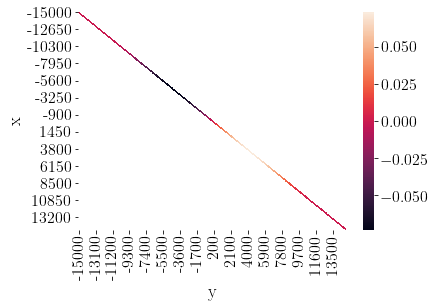

In [19]:
data = pd.DataFrame(data={'x':x, 'y':x, 'z':wfz[:,1]})
data = data.pivot(index='x', columns='y', values='z')
sns.heatmap(data)

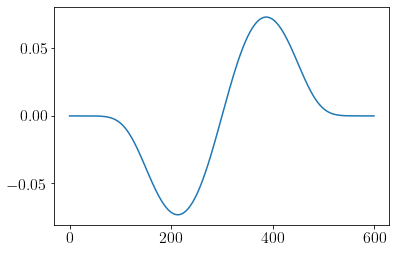

In [20]:
plt.plot(wfz[:,1])